In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import chisquare

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fl_df=pd.read_csv("/content/drive/MyDrive/fl_statewide_2020_04_01.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,7,10,11,13,14,17,18,19,21,22,23,24,26,27,28,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
list(fl_df.columns)

['raw_row_number',
 'date',
 'time',
 'location',
 'county_name',
 'subject_age',
 'subject_race',
 'subject_sex',
 'officer_id_hash',
 'officer_age',
 'officer_race',
 'officer_sex',
 'officer_years_of_service',
 'department_name',
 'unit',
 'type',
 'violation',
 'arrest_made',
 'citation_issued',
 'warning_issued',
 'outcome',
 'frisk_performed',
 'search_conducted',
 'search_basis',
 'reason_for_search',
 'reason_for_stop',
 'vehicle_registration_state',
 'notes',
 'raw_row_number_old',
 'raw_Race',
 'raw_Ethnicity',
 'raw_row_number_new',
 'raw_SearchType',
 'raw_EnforcementAction']

In [ ]:
#Discarding NaN and unknown values:
print(fl_df['subject_race'].unique().tolist())
# Delete rows with 'unknown' and 'nan' for 'subject_race'
fl_df = fl_df[fl_df['subject_race'] != 'unknown']
fl_df = fl_df[fl_df['subject_race'].notna()]

[nan, 'white', 'black', 'hispanic', 'asian/pacific islander', 'other', 'unknown']


In [ ]:
# Create an empty count dataframe with row and column names
count_df = pd.DataFrame(columns=['Race',
                                 'Total',
                                 'Warning=0_Citation=0',
                                 'Warning=0_Citation=1',
                                 'Warning=1_Citation=0',
                                 'Warning=1_Citation=1'])
count_df['Race'] = fl_df['subject_race'].unique().tolist()
count_df

,Race,Total,Warning=0_Citation=0,Warning=0_Citation=1,Warning=1_Citation=0,Warning=1_Citation=1
0,white,NaN,NaN,NaN,NaN,NaN
1,black,NaN,NaN,NaN,NaN,NaN
2,hispanic,NaN,NaN,NaN,NaN,NaN
3,asian/pacific islander,NaN,NaN,NaN,NaN,NaN
4,other,NaN,NaN,NaN,NaN,NaN


In [ ]:
for race in fl_df['subject_race'].unique().tolist():
    race_df = fl_df[fl_df['subject_race'] == race]
    count_df.loc[count_df['Race'] == race, 'Total'] = len(race_df)
    count_df.loc[count_df['Race'] == race, 'Warning=0_Citation=0'] = len(race_df.query('warning_issued==False & citation_issued==False'))
    count_df.loc[count_df['Race'] == race, 'Warning=0_Citation=1'] = len(race_df.query('warning_issued==False & citation_issued==True'))
    count_df.loc[count_df['Race'] == race, 'Warning=1_Citation=0'] = len(race_df.query('warning_issued==True & citation_issued==False'))
    count_df.loc[count_df['Race'] == race, 'Warning=1_Citation=1'] = len(race_df.query('warning_issued==True & citation_issued==True'))

print(count_df.to_string(index=False))

                  Race   Total Warning=0_Citation=0 Warning=0_Citation=1 Warning=1_Citation=0 Warning=1_Citation=1
                 white 4088311               904592              1348999              1096522               487950
                 black 1409006               348648               489861               319764               173638
              hispanic 1502816               353494               622166               280971               167718
asian/pacific islander   93421                19438                37550                21351                10357
                 other  201920                53527                76020                42085                21155


In [ ]:
percentage_dict = {}

for race in ['white', 'black', 'hispanic']:
    percentage_dict[race] = []
    percentage_dict[race].append(100 * count_df[count_df['Race'] == race]['Warning=0_Citation=0'].values[0] / count_df[count_df['Race'] == race]['Total'].values[0])
    percentage_dict[race].append(100 * count_df[count_df['Race'] == race]['Warning=1_Citation=0'].values[0] / count_df[count_df['Race'] == race]['Total'].values[0])
    percentage_dict[race].append(100 * count_df[count_df['Race'] == race]['Warning=0_Citation=1'].values[0] / count_df[count_df['Race'] == race]['Total'].values[0])
    percentage_dict[race].append(100 * count_df[count_df['Race'] == race]['Warning=1_Citation=1'].values[0] / count_df[count_df['Race'] == race]['Total'].values[0])

In [ ]:
def autolabel(rects, ax, format_str):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(format_str.format(height/100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=16)

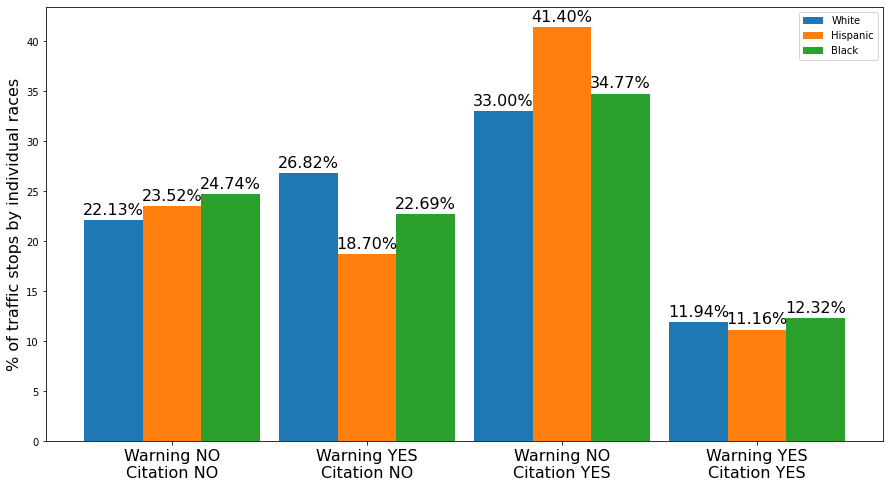

In [ ]:
labels = ['Warning NO\nCitation NO', 'Warning YES\nCitation NO', 'Warning NO\nCitation YES', 'Warning YES\nCitation YES']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(x - width, percentage_dict['white'], width, label='White')
rects2 = ax.bar(x, percentage_dict['hispanic'], width, label='Hispanic')
rects3 = ax.bar(x + width, percentage_dict['black'], width, label='Black')

ax.set_ylabel('% of traffic stops by individual races', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend()

format_str = '{:.2%}'
autolabel(rects1, ax, format_str)
autolabel(rects2, ax, format_str)
autolabel(rects3, ax, format_str)

plt.show()


### **Plot 1b: Out of all people of a certain race stopped, what is the percentage of people that get a citation?**

In [ ]:
# Get info on how the races split up into citation YES or citation NO by percentage
percentage_dict = {}

for cat1, cat2 in [('Warning=0_Citation=0', 'Warning=1_Citation=0'), ('Warning=0_Citation=1', 'Warning=1_Citation=1')]:
    percentage_dict[(cat1, cat2)] = []
    for race in ['white', 'black', 'hispanic']:
        percentage_dict[(cat1, cat2)].append(100 * (count_df[count_df['Race'] == race][cat1].values[0] + count_df[count_df['Race'] == race][cat2].values[0]) / count_df[count_df['Race'] == race]['Total'].values[0])


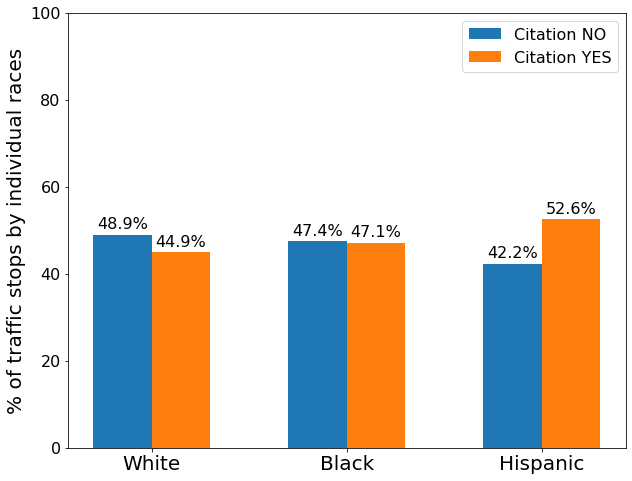

In [ ]:
labels = ['White', 'Black', 'Hispanic']

x = np.arange(len(labels))  # the label locations

fig = plt.figure(figsize=(10,8))
ax2 = fig.add_subplot(111)
rects4 = ax2.bar(x - width/2, percentage_dict[('Warning=0_Citation=0', 'Warning=1_Citation=0')], width, label='Citation NO')
rects5 = ax2.bar(x + width/2, percentage_dict[('Warning=0_Citation=1', 'Warning=1_Citation=1')], width, label='Citation YES')

ax2.set_ylabel('% of traffic stops by individual races', fontsize=20)
ax2.tick_params(axis="y", labelsize=16)
ax2.set_ylim(0, 100)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, fontsize=20)
ax2.legend(fontsize=16)
# plt.grid(True, axis='y')

format_str = '{:.1%}'
autolabel(rects4, ax2, format_str)
autolabel(rects5, ax2, format_str)

plt.show()

### **Plot 2a: What is the percentage of the races in each of the 4 categories?**

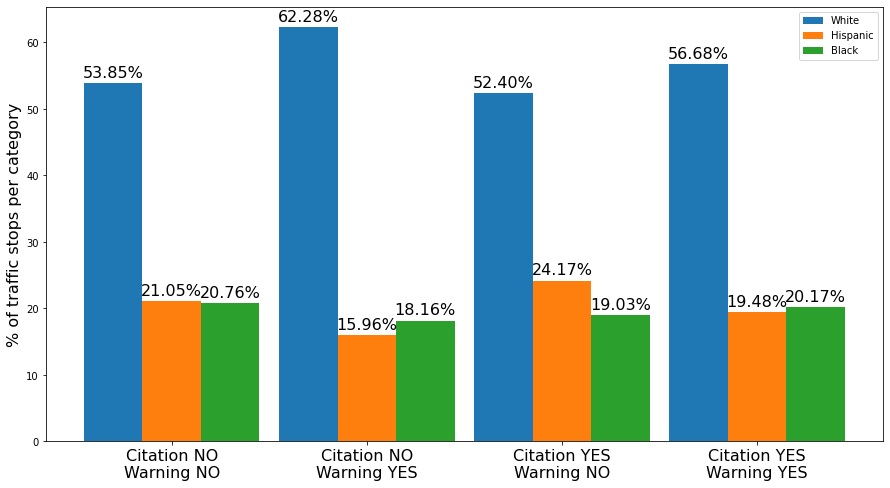

In [ ]:
# Get info on how the races split up in 4 categories by percentage
percentage_dict_2a = {}

for race in ['white', 'black', 'hispanic']:
    percentage_dict_2a[race] = []
    percentage_dict_2a[race].append(100 * count_df[count_df['Race'] == race]['Warning=0_Citation=0'].values[0] / count_df['Warning=0_Citation=0'].sum())
    percentage_dict_2a[race].append(100 * count_df[count_df['Race'] == race]['Warning=1_Citation=0'].values[0] / count_df['Warning=1_Citation=0'].sum())
    percentage_dict_2a[race].append(100 * count_df[count_df['Race'] == race]['Warning=0_Citation=1'].values[0] / count_df['Warning=0_Citation=1'].sum())
    percentage_dict_2a[race].append(100 * count_df[count_df['Race'] == race]['Warning=1_Citation=1'].values[0] / count_df['Warning=1_Citation=1'].sum())
labels = ['Citation NO\nWarning NO', 'Citation NO\nWarning YES', 'Citation YES\nWarning NO', 'Citation YES\nWarning YES']

x = np.arange(len(labels))  # the label locations

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
rects7 = ax1.bar(x - width, percentage_dict_2a['white'], width, label='White')
rects8 = ax1.bar(x, percentage_dict_2a['hispanic'], width, label='Hispanic')
rects9 = ax1.bar(x + width, percentage_dict_2a['black'], width, label='Black')

ax1.set_ylabel('% of traffic stops per category', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=16)
ax1.legend()

format_str = '{:.2%}'
autolabel(rects7, ax1, format_str)
autolabel(rects8, ax1, format_str)
autolabel(rects9, ax1, format_str)

plt.show()


### **Plot 2b: Percentage of the races in each category by white and POC only**

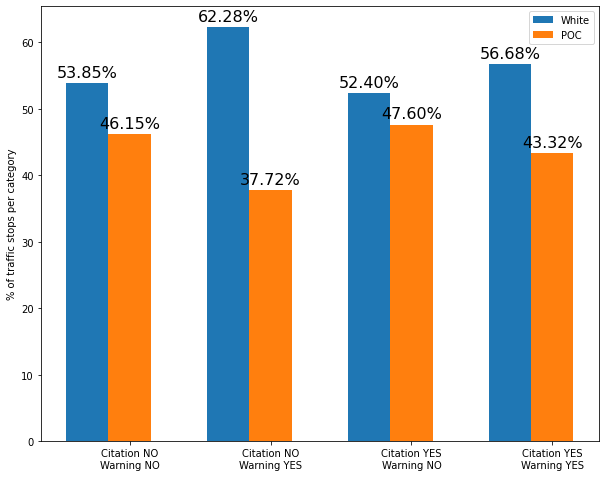

In [ ]:
# Get info on how the races split up in 4 categories by percentage
percentage_dict = {}

for race in ['white', 'poc']:
    percentage_dict[race] = []
    
    if race == 'poc':
        percentage_dict[race].append(100 * (1 - count_df[count_df['Race'] == 'white']['Warning=0_Citation=0'].values[0] / count_df['Warning=0_Citation=0'].sum()))
        percentage_dict[race].append(100 * (1 - count_df[count_df['Race'] == 'white']['Warning=1_Citation=0'].values[0] / count_df['Warning=1_Citation=0'].sum()))
        percentage_dict[race].append(100 * (1 - count_df[count_df['Race'] == 'white']['Warning=0_Citation=1'].values[0] / count_df['Warning=0_Citation=1'].sum()))
        percentage_dict[race].append(100 * (1 - count_df[count_df['Race'] == 'white']['Warning=1_Citation=1'].values[0] / count_df['Warning=1_Citation=1'].sum()))
    else:
        percentage_dict[race].append(100 * count_df[count_df['Race'] == race]['Warning=0_Citation=0'].values[0] / count_df['Warning=0_Citation=0'].sum())
        percentage_dict[race].append(100 * count_df[count_df['Race'] == race]['Warning=1_Citation=0'].values[0] / count_df['Warning=1_Citation=0'].sum())
        percentage_dict[race].append(100 * count_df[count_df['Race'] == race]['Warning=0_Citation=1'].values[0] / count_df['Warning=0_Citation=1'].sum())
        percentage_dict[race].append(100 * count_df[count_df['Race'] == race]['Warning=1_Citation=1'].values[0] / count_df['Warning=1_Citation=1'].sum())
fig = plt.figure(figsize=(10,8))
ax3 = fig.add_subplot(111)
rects0 = ax3.bar(x - width, percentage_dict['white'], width, label='White')
rects11 = ax3.bar(x, percentage_dict['poc'], width, label='POC')

ax3.set_ylabel('% of traffic stops per category')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.legend()

format_str = '{:.2%}'
autolabel(rects0, ax3, format_str)
autolabel(rects11, ax3, format_str)

plt.show()

### **Plot 2c: Percentage of races in citation YES and citation NO categories**

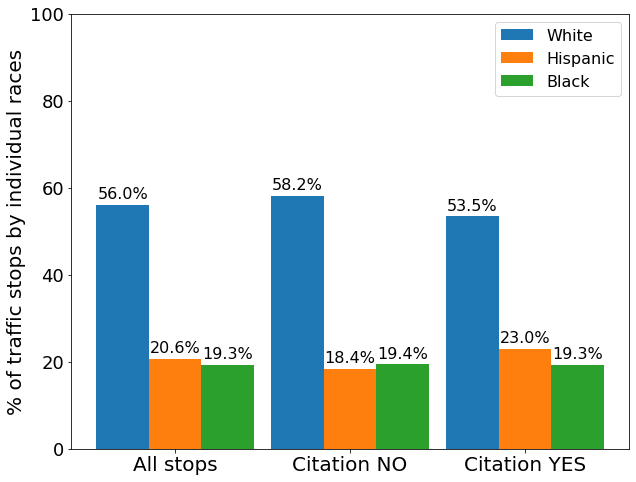

In [ ]:
# Get info on how the races split up in 4 categories by percentage
percentage_dict = {}

for race in ['white', 'hispanic', 'black']:
    percentage_dict[race] = []
    
    percentage_dict[race].append(100 * count_df[count_df['Race'] == race]['Total'].values[0] / count_df['Total'].sum())
    percentage_dict[race].append(100 * (count_df[count_df['Race'] == race]['Warning=0_Citation=0'].values[0] + count_df[count_df['Race'] == race]['Warning=1_Citation=0'].values[0])/(count_df['Warning=0_Citation=0'].sum() + count_df['Warning=1_Citation=0'].sum()))
    percentage_dict[race].append(100 * (count_df[count_df['Race'] == race]['Warning=0_Citation=1'].values[0] + count_df[count_df['Race'] == race]['Warning=1_Citation=1'].values[0])/(count_df['Warning=0_Citation=1'].sum() + count_df['Warning=1_Citation=1'].sum()))
labels = ['All stops', 'Citation NO', 'Citation YES']

x = np.arange(len(labels))  # the label locations

fig = plt.figure(figsize=(10,8))
ax2 = fig.add_subplot(111)
rects4 = ax2.bar(x - width, percentage_dict['white'], width, label='White')
rects5 = ax2.bar(x, percentage_dict['hispanic'], width, label='Hispanic')
rects6 = ax2.bar(x + width, percentage_dict['black'], width, label='Black')

ax2.set_ylabel('% of traffic stops by individual races', fontsize=20)
ax2.tick_params(axis="y", labelsize=18)
ax2.set_ylim(0,100)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, fontsize=20)
ax2.legend(fontsize=16)

format_str = '{:.1%}'
autolabel(rects4, ax2, format_str)
autolabel(rects5, ax2, format_str)
autolabel(rects6, ax2, format_str)

plt.show()

### **Plot 2d: Percentage of the races in citation/warning/nothing**

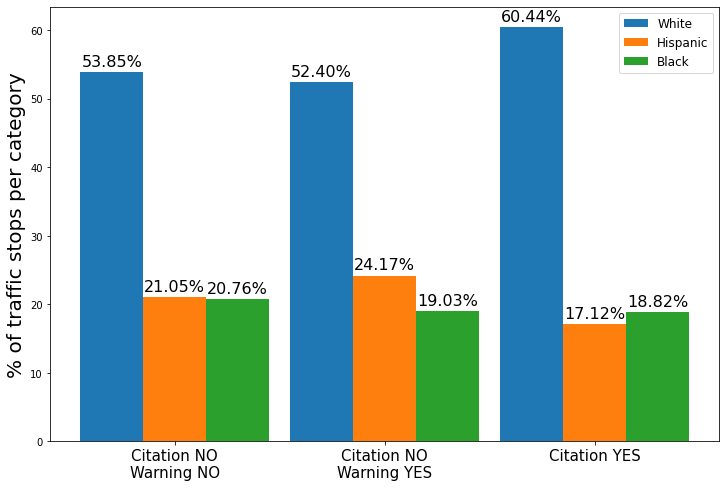

In [ ]:
labels = ['Citation NO\nWarning NO', 'Citation NO\nWarning YES', 'Citation YES']

x = np.arange(len(labels))  # the label locations
fig4 = plt.figure(figsize=(12,8))
ax4 = fig4.add_subplot(111)
rects12 = ax4.bar(x - width, percentage_dict['white'], width, label='White')
rects13 = ax4.bar(x, percentage_dict['hispanic'], width, label='Hispanic')
rects14 = ax4.bar(x + width, percentage_dict['black'], width, label='Black')

ax4.set_ylabel('% of traffic stops per category', fontsize=20)
ax4.set_xticks(x)
ax4.set_xticklabels(labels, fontsize=15)
ax4.legend(fontsize=12)

format_str = '{:.2%}'
autolabel(rects12, ax4, format_str)
autolabel(rects13, ax4, format_str)
autolabel(rects14, ax4, format_str)

plt.show()

### **Chi Square Test on Plot 2a**

In [ ]:
f_exp = [[76.9, 26.8, 16.9]]*4 # from 2019 https://www.census.gov/quickfacts/FL
f_obs = []

for race in ['white', 'hispanic', 'black']:
    f_obs.append(percentage_dict_2a[race]) # Citation NO\nWarning NO, Citation NO\nWarning YES, Citation YES\nWarning NO, Citation YES\nWarning YES

f_obs = np.array(f_obs)
f_exp = np.array(f_exp).T

f_obs

array([[53.85441082, 62.27786445, 52.39653134, 56.68445595],
       [21.0450801 , 15.95797791, 24.16557782, 19.48356099],
       [20.75657603, 18.1612581 , 19.02671332, 20.17127895]])

In [ ]:
chisquare(f_obs, f_exp=f_exp)

ValueError: ignored

### **Chi Square Test on No Citation/Citation**

In [ ]:
f_exp = [[78.7, 39.7, 12.9]]*2
f_obs = []
races = ['white', 'black', 'hispanic']
for i in range(len(races)):
    f_obs.append([])
    f_obs[i].append(100 * (count_df[count_df['Race'] == races[i]]['Warning=0_Citation=0'].values[0] + count_df[count_df['Race'] == races[i]]['Warning=1_Citation=0'].values[0]) / (count_df['Warning=0_Citation=0'].sum() + count_df['Warning=1_Citation=0'].sum()))
    f_obs[i].append(100 * (count_df[count_df['Race'] == races[i]]['Warning=0_Citation=1'].values[0] + count_df[count_df['Race'] == races[i]]['Warning=1_Citation=1'].values[0]) / (count_df['Warning=0_Citation=1'].sum() + count_df['Warning=1_Citation=1'].sum()))
    
f_exp = np.array(f_exp).T
f_obs = np.array(f_obs)

In [ ]:









































chisquare(f_obs, f_exp=f_exp)

ValueError: ignored

### **Timeseries Plot**

In [ ]:
race_list = ['white', 'hispanic', 'black']
timeseries_df = fl_df.filter(items=['date', 'subject_race', 'citation_issued'])
timeseries_df['date'] = pd.to_datetime(timeseries_df['date']).dt.year
timeseries_df = timeseries_df[timeseries_df.subject_race.isin(race_list)].dropna()
print(timeseries_df.head())

   date subject_race citation_issued
1  2010        white           False
2  2010        white           False
3  2010        white            True
4  2010        black            True
6  2010        white           False


In [ ]:
plt.figure()
for race in race_list:
    race_df = timeseries_df[timeseries_df['subject_race'] == race].drop('subject_race', 1).value_counts().reset_index(name='counts')
    race_df=race_df.drop([1,2]).reset_index(drop=True)
    race_df.squeeze(axis=1)
    citation_df = pd.DataFrame(columns=['year', 'citation_rate'])
    years = timeseries_df['date'].unique().tolist()
    citation_df['year'] = years
    rates = []
    

NameError: ignored

In [ ]:
for year in years:
        rates.append(race_df[(year, True)] / (race_df[(year, True)] + race_df[(year, False)]))
    citation_df['citation_rate'] = rates
    plt.plot(citation_df['year'], citation_df['citation_rate'], label=race)
plt.legend()
plt.xlabel('year')
plt.ylabel('citation rate')
plt.show()

In [ ]:
type(race_df)

pandas.core.frame.DataFrame